# Hands-on Machine Learning - Chapter 10 - Examples

# Setup

In [0]:
# Python 3.5 or above 
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn version 0.20 or above
import sklearn
assert sklearn.__version__ >= "0.20"

# Tensorflow 2.0 or above required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports 
import numpy as np 
import os 

# Seeding random number generator to make output consistent across runs
np.random.seed(42)

# For plotting pretty figures
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Filepaths for saving figures
ROOT_DIR = '.'
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True) 

# Function for saving figures
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)

  if tight_layout:
    plt.tight_layout()

  plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore warnings for this notebook
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')


# Example 1 - Perceptron

In [0]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron # Implements single layer of TLUs

In [0]:
# Loading Iris flowers dataset
iris = load_iris() 
X = iris.data[:, (2, 3)]              # Petal length, petal width
y = (iris.target == 0).astype(np.int) # One-vs-rest classification for Setosa

In [7]:
# Instantiating, fitting, and evaluating a Perceptron classifier
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

# Prediction for a petal length and width of 2cm/0.5cm
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)                         # Predicted to be a Setosa flower

[1]


## Visualizing Perceptron Behaviour
- A perceptron consists of a single layer of threshold logic units (TLUs).
- The decision boundary of an individual TLU is linear.
- This means the decision boundary of the Perceptron will also be linear, since its output is simply the collective output of all its TLUs. 

Saving figure perceptron_iris_plot


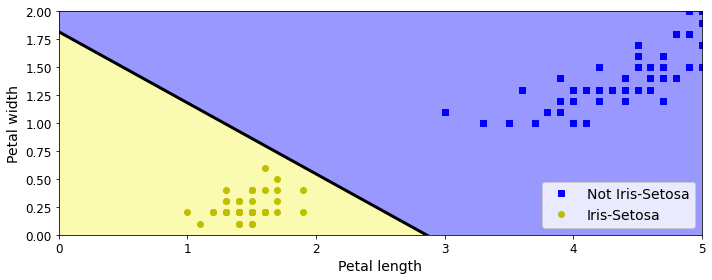

In [13]:
# Calculate the slope and intercept of the decision boundary
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

# Grid of values between axes limits - will be used as test points
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)

# Combine the two feature values as column vectors in a matrix
X_new = np.c_[x0.ravel(), x1.ravel()]

# Make predictions on the space of new data
y_predict = per_clf.predict(X_new)

# What is this?
zz = y_predict.reshape(x0.shape)

# Create a new figure
plt.figure(figsize=(10, 4))

# Index and plot all training samples with different labels according to their class
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', label='Not Iris-Setosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'yo', label='Iris-Setosa')

# Plot the decision boundary - (x coordinates), (y coordinates)
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], 'k-', linewidth=3)

# Define colours for the contour map that shows the regions separated by the boundary
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# Plot a contour map
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

# Save the figure
save_fig('perceptron_iris_plot')
plt.show()

# Example 2 - Activation Functions

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def relu(z):
  return np.maximum(0, z)

def derivative(f, z, eps=0.0000001):
  """Manually computing the derivative of a function based on first principles"""
  return (f(z + eps) - f(z - eps)) / (2 * eps)

Saving figure activation_functions_plot


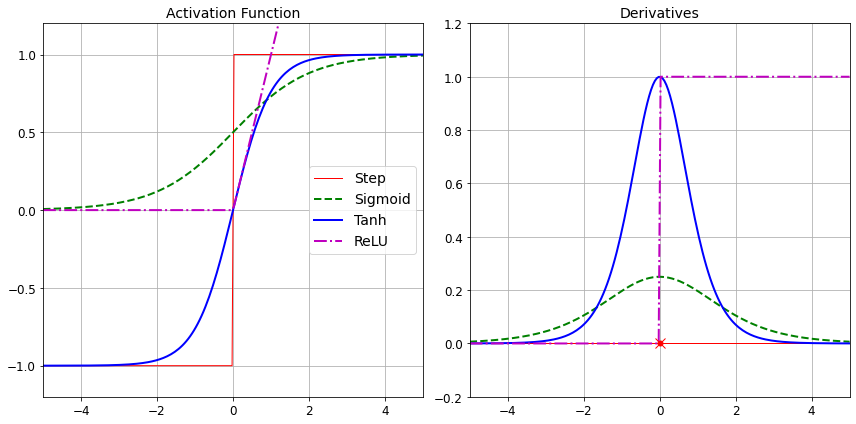

In [22]:
# Defining space of values to compute activation functions 
z = np.linspace(-5, 5, 200)

# Comparing relu and sigmoid activation functions side by side
plt.figure(figsize=(12, 6))

# FIRST PLOT - ACTIVATION FUNCTIONS
plt.subplot(121)
plt.plot(z, np.sign(z), 'r-', linewidth=1, label='Step')
plt.plot(z, sigmoid(z), 'g--', linewidth=2, label='Sigmoid')
plt.plot(z, np.tanh(z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, relu(z), 'm-.', linewidth=2, label='ReLU')
plt.grid(True)
plt.legend(loc='center right', fontsize=14)
plt.title('Activation Function', fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# SECOND PLOT - DERIVATIVES OF ACTIVATION FUNCTIONS
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), 'r-', linewidth=1, label='Step')
plt.plot(z, derivative(sigmoid, z), 'g--', linewidth=2, label='Sigmoid')
plt.plot(z, derivative(np.tanh, z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, derivative(relu, z), 'm-.', linewidth=2, label='ReLU')

# Adding markers at (0, 0) to highlight discontinuities in gradients
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)

# Redefining axis limits
plt.axis([-5, 5, -0.2, 1.2])

plt.grid(True)
plt.title('Derivatives', fontsize=14)

save_fig('activation_functions_plot')